In [1]:
# Packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

A `seed` is a positive integer that initializes a random-number generator (technically, a pseudorandom-number generator). 

A seed enables you to create `reproducible` streams of random numbers.

By `default` the random number generator uses the current system `time`.

In [3]:
np.random.seed(42)

In [4]:
# Population
df = pd.read_excel('nba_ht_wt.xls')
df.head()

,Player,Pos,Height,Weight,Age,School,BDate
0,Vitor Faverani,C,83,260,25,None,1988-05-05
1,Avery Bradley,G,74,180,22,Texas,1990-11-26
2,Keith Bogans,G,77,215,33,Kentucky,1980-05-12
3,Jared Sullinger,F,81,260,21,Ohio State,1992-03-04
4,Jeff Green,F,81,235,27,Georgetown,1986-08-28


In [5]:
df.shape

(505, 7)

In [6]:
df = df[['Weight']]
df.head()

,Weight
0,260
1,180
2,215
3,260
4,235


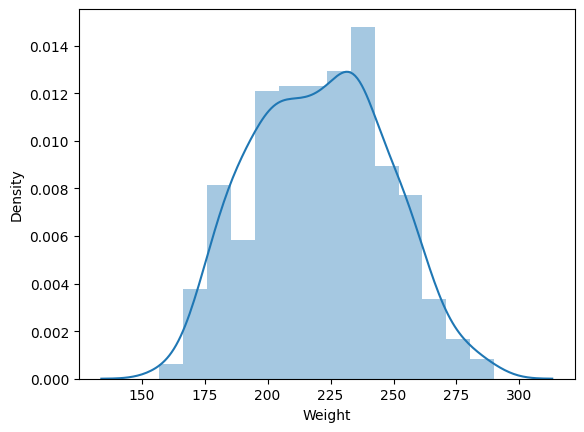

In [7]:
sns.distplot(df.Weight)
plt.show()

In [8]:
df.Weight.mean()

220.67326732673268

This is the true mean weight of the population. This is the population parameter, the ground truth.  

Let's take a random sample from this data, and see what mean we get.

In [9]:
samp_size = 30

In [10]:
df.Weight.sample(samp_size).mean()

222.1

Quite different from the population mean, right?  
Let's take another sample.

In [11]:
df.Weight.sample(samp_size).mean()

220.5

And another.

In [12]:
df.Weight.sample(samp_size).mean()

221.6

Each time we take a sample, our mean value is different. There is variability in the sample mean itself. Does the sample mean itself follow a distribution? Let's assess this.   
We'll take many samples from the data, and plot a histogram of the same.

In [13]:
sample_means = [df.Weight.sample(samp_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

In [14]:
len(sample_means)

1000

Plotting the density for the sample means.

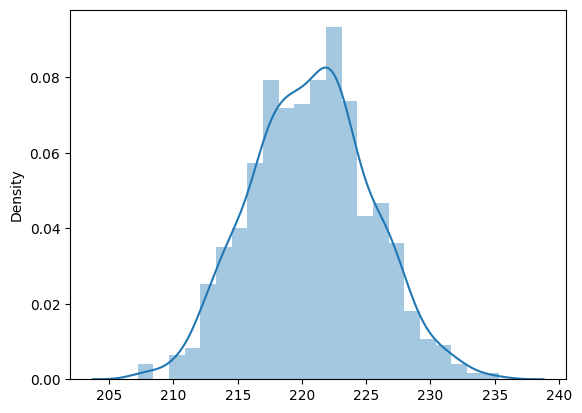

In [15]:
sns.distplot(sample_means)
plt.show()

Which distribution does this look like?

In [16]:
sample_means.mean()

220.69450000000003

In [17]:
sample_means.std()

4.641450507418217

In [18]:
sample_means.std(ddof=0)

4.6391292016929215

Population std vs. std of sampling mean

In [19]:
help(df.std)

# `ddof=0` can be set to normalize by N instead of N-1

Help on method std in module pandas.core.generic:

std(axis=None, skipna=True, level=None, ddof=1, numeric_only=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Return sample standard deviation over requested axis.
    
    Normalized by N-1 by default. This can be changed using the ddof argument.
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
        For `Series` this parameter is unused and defaults to 0.
    skipna : bool, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    
        .. deprecated:: 1.3.0
            The level keyword is deprecated. Use groupby instead.
    ddof : int, default 1
        Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
        where N represents the number of elements.
 

In [20]:
df.Weight.std(ddof=0)/np.sqrt(samp_size)

4.8595256332409775

In [21]:
df.Weight.std()/np.sqrt(samp_size)

4.864344202231695

Let's make sure we got this right.
 - What happened here?
 - What is a sampling distribution
 - What is expected to follow a normal distribution?

#### Claim: This phenomenon occurs, rather, this theorem holds regardless of the underying populations distribution.
That seems very far fetched. We'll need to see it to believe it.

In [22]:
df1 = pd.read_csv("exp_data.csv")

In [23]:
df1.head()

,VAL
0,362
1,361
2,360
3,359
4,358


In [24]:
df1.shape

(1112, 1)

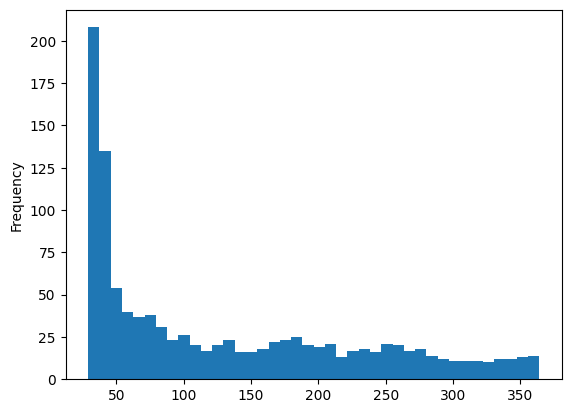

In [25]:
df1.VAL.plot.hist(bins=40)
plt.show()

Looks like an exponential distribution.

Let's pick samples from this distribution, record their means, and plot the sampling distribution.

In [26]:
samp_size = 50

In [27]:
sample_means = [df1.VAL.sample(samp_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

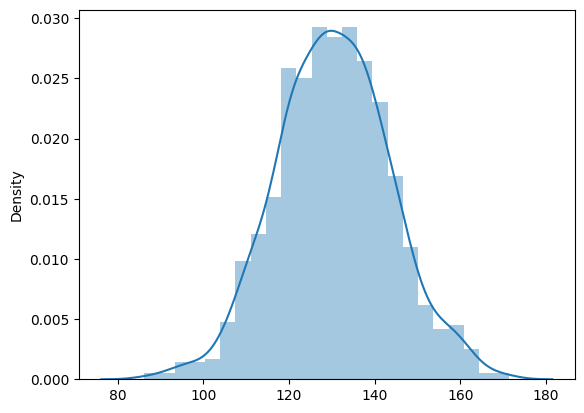

In [28]:
sns.distplot(sample_means)
plt.show()

In [29]:
sample_means.mean()

130.39214

In [30]:
df1.VAL.mean()

130.4181654676259

In [31]:
sample_means.std()

13.263962580003147

In [32]:
df1.VAL.std(ddof=0)/np.sqrt(samp_size)

14.054133876259558

In [33]:
df1.VAL.std()/np.sqrt(samp_size)

14.06045744637763

### Effect of sample size

In [34]:
sample_sizes = [3, 10, 30, 50, 100, 200]

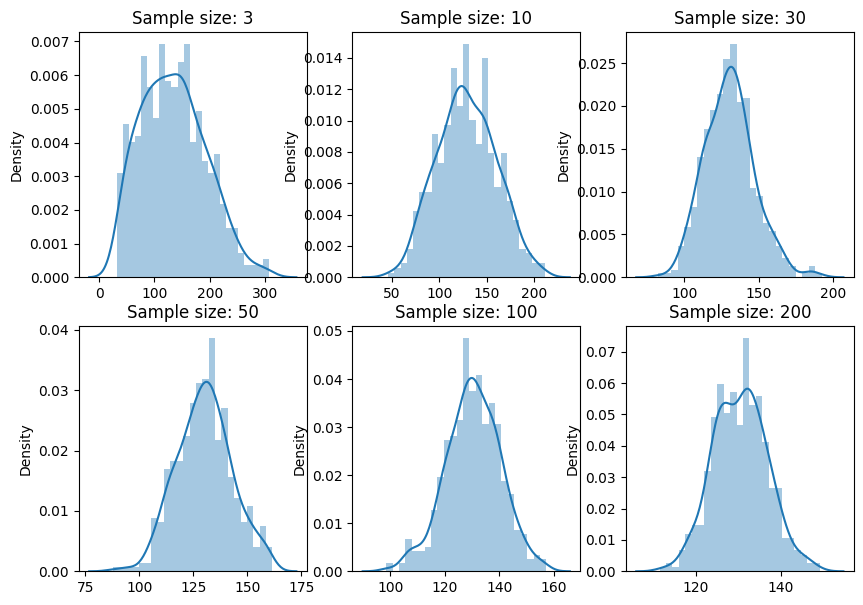

In [35]:
plt.figure(figsize=[10,7])
for ind, samp_size in enumerate(sample_sizes):
    sample_means = [df1.VAL.sample(samp_size).mean() for i in range(500)]
    plt.subplot(2,3,ind+1)
    sns.distplot(sample_means, bins=25)
    plt.title("Sample size: "+str(samp_size))
plt.show()

What is the significance of this, and why is it useful? Used in the industry?